# GLX4.1.0 Glx_Pubchem_Uniprot_Classification_Data_79980610

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:

protein_names = np.load('protein_array.npy',allow_pickle=True)
prt_root = '/gxr/tongyuang/data/CPI/GLX4.1.0/sub_data/Glx_Pubchem_Uniprot_Classification_Data_79980610_proteins/'
name_dict = np.load(prt_root+'sequence_idx_dict.npy',allow_pickle=True)
name_dict = name_dict.item()

In [3]:
reversed_name_dict = {}
for key in name_dict.keys():
    reversed_name_dict[name_dict[key]] = key

In [7]:
output_file_name = './sequence_statistics.csv'
output_df = pd.read_csv(output_file_name)


In [8]:
'''

output_file_name = './sequence_statistics.csv'
headers = ['sequence','idx','length','num_pos_lbl','num_neg_lbl']
output_df = pd.DataFrame(columns=headers)
for filename in os.listdir(prt_root):
    if filename.startswith('sequence_idx_dict'):
        continue
    else:
        cur_prt_statistics = np.load(prt_root+filename,allow_pickle=True)
        prt_idx = int(filename[:-4])
        
        cur_prt = {}
        
        cur_prt['sequence'] = reversed_name_dict[prt_idx]
        cur_prt['idx'] = prt_idx
        cur_prt['length'] = cur_prt_statistics.shape[0]
        cur_prt['num_pos_lbl'] = int(np.sum(cur_prt_statistics[:,3]))
        cur_prt['num_neg_lbl'] = cur_prt['length']-cur_prt['num_pos_lbl']
        output_df = output_df.append(cur_prt,ignore_index=True)

output_df.to_csv(output_file_name,index=False)
'''


"\n\noutput_file_name = './sequence_statistics.csv'\nheaders = ['sequence','idx','length','num_pos_lbl','num_neg_lbl']\noutput_df = pd.DataFrame(columns=headers)\nfor filename in os.listdir(prt_root):\n    if filename.startswith('sequence_idx_dict'):\n        continue\n    else:\n        cur_prt_statistics = np.load(prt_root+filename,allow_pickle=True)\n        prt_idx = int(filename[:-4])\n        \n        cur_prt = {}\n        \n        cur_prt['sequence'] = reversed_name_dict[prt_idx]\n        cur_prt['idx'] = prt_idx\n        cur_prt['length'] = cur_prt_statistics.shape[0]\n        cur_prt['num_pos_lbl'] = int(np.sum(cur_prt_statistics[:,3]))\n        cur_prt['num_neg_lbl'] = cur_prt['length']-cur_prt['num_pos_lbl']\n        output_df = output_df.append(cur_prt,ignore_index=True)\n\noutput_df.to_csv(output_file_name,index=False)\n"

In [9]:
output_df.shape

(7644, 9)

In [10]:
import matplotlib.pyplot as plt

lengths = np.asarray(list(output_df['length'].values))
num_pos_lbls = np.asarray(list(output_df['num_pos_lbl'].values))
num_neg_lbls = np.asarray(list(output_df['num_neg_lbl'].values))

pos_percent= np.asarray(list(output_df['pos_percent'].values))


In [11]:
big_thres = 5e5

small_thres=1e4
big_list = []
med_list = []
small_list = []

for i,l in enumerate(lengths):
    if l > big_thres:
        big_list.append([i,l])
    elif l > small_thres:
        med_list.append([i,l])
    else:
        small_list.append([i,l])
        

big_array = np.array(big_list)
med_array = np.array(med_list)
small_array = np.array(small_list)

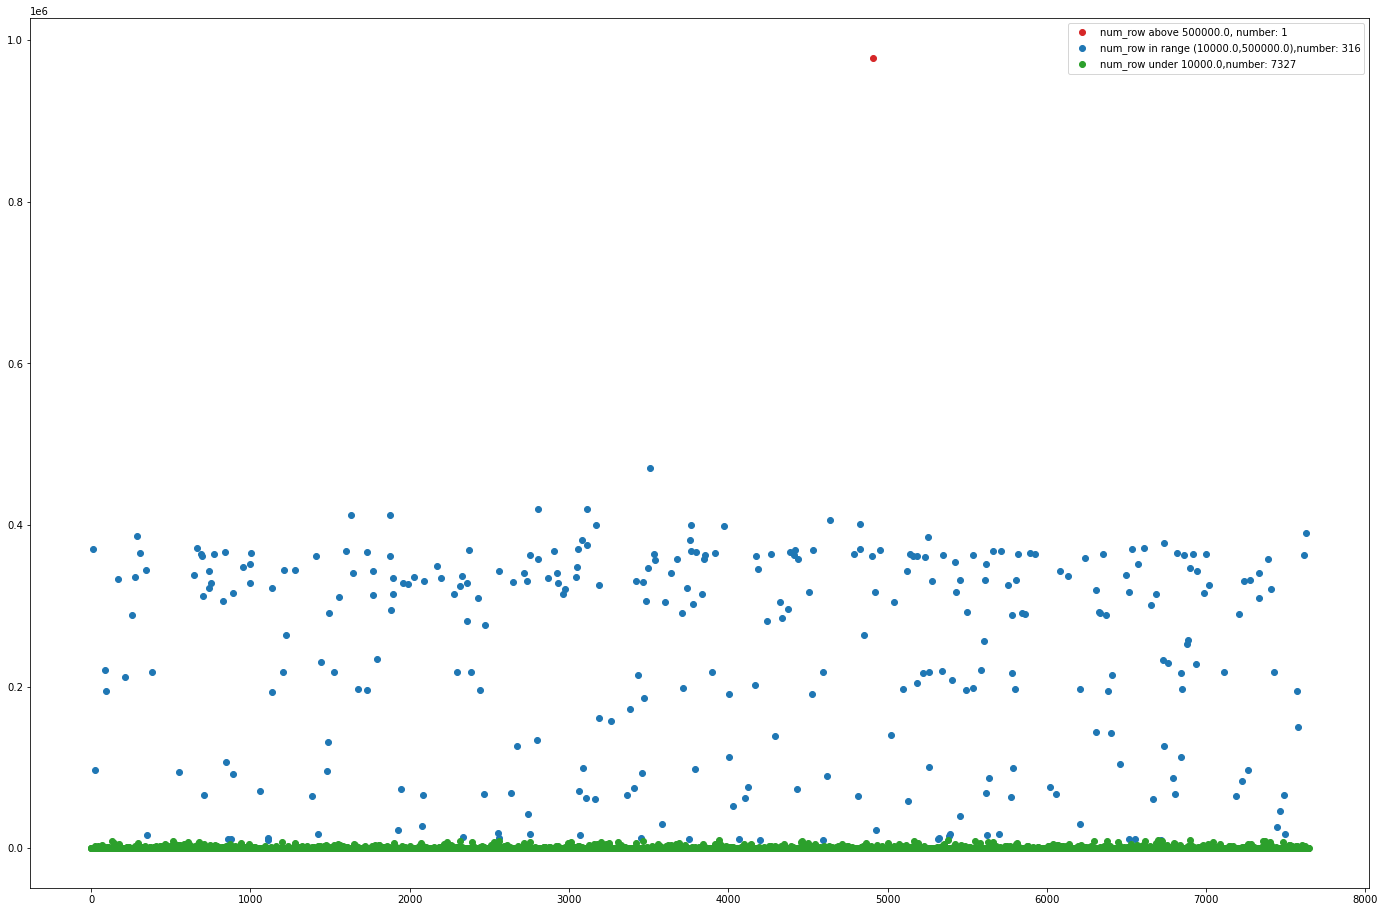

In [12]:
plt.figure(figsize=(24,16))

plt.scatter(big_array[:,0],big_array[:,1],color='tab:red',label='num_row above {}, number: {}'.format(big_thres,big_array.shape[0]))
plt.scatter(med_array[:,0],med_array[:,1],color='tab:blue',label='num_row in range ({},{}),number: {}'.format(small_thres, big_thres,med_array.shape[0]))
plt.scatter(small_array[:,0],small_array[:,1],color='tab:green',label='num_row under {},number: {}'.format(small_thres,small_array.shape[0]))
#print(colors)
#plt.plot(xs,lengths,color='red')

#plt.plot(lengths)
plt.legend()
plt.show()

In [13]:
def locate_length(ll,xrange):
    # xrange已经排序好了
    for i in range(1,len(xrange)):
        if ll<xrange[i]:
            return i-1
    return len(xrange)-1

In [14]:
# 手动统计信息
# 分为0-10，10-100，100-1000，1000-10000，10000-500000,500000+
xrange = [0,10,100,1000,10000,500000]
x_bars = []
for i in range(len(xrange)):
    x_bars.append([])

for ll in lengths:
    try:
        x_bars[locate_length(ll,xrange)].append(ll)
    except:
        print(locate_length(ll,xrange))
        break

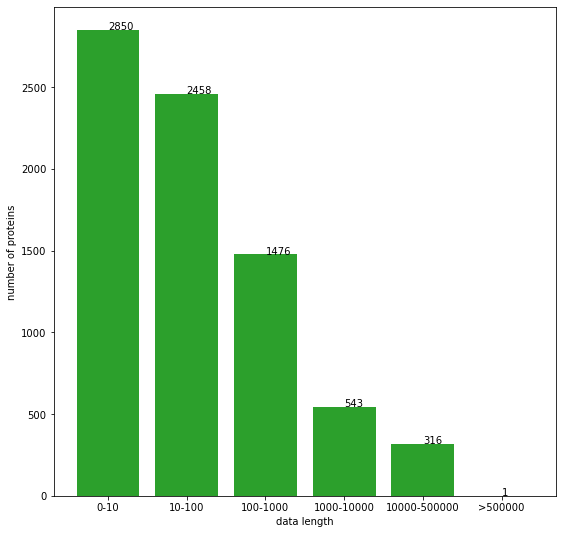

In [15]:
y_values = []
x_plot = []
for i in range(len(xrange)):
    y_values.append(len(x_bars[i]))
    if(i<len(xrange)-1):
        x_plot.append(str(xrange[i])+'-'+str(xrange[i+1]))

x_plot.append('>'+str(xrange[-1]))
              
x_values = range(6)
plt.figure(figsize=(9,9))
plt.bar(x_values,y_values,color='tab:green')
for x,y in enumerate(y_values):
    plt.text(x,y+2,y_values[x])

plt.xlabel('data length')
plt.ylabel('number of proteins')


#for i in range()
plt.xticks(x_values,x_plot)
plt.show()

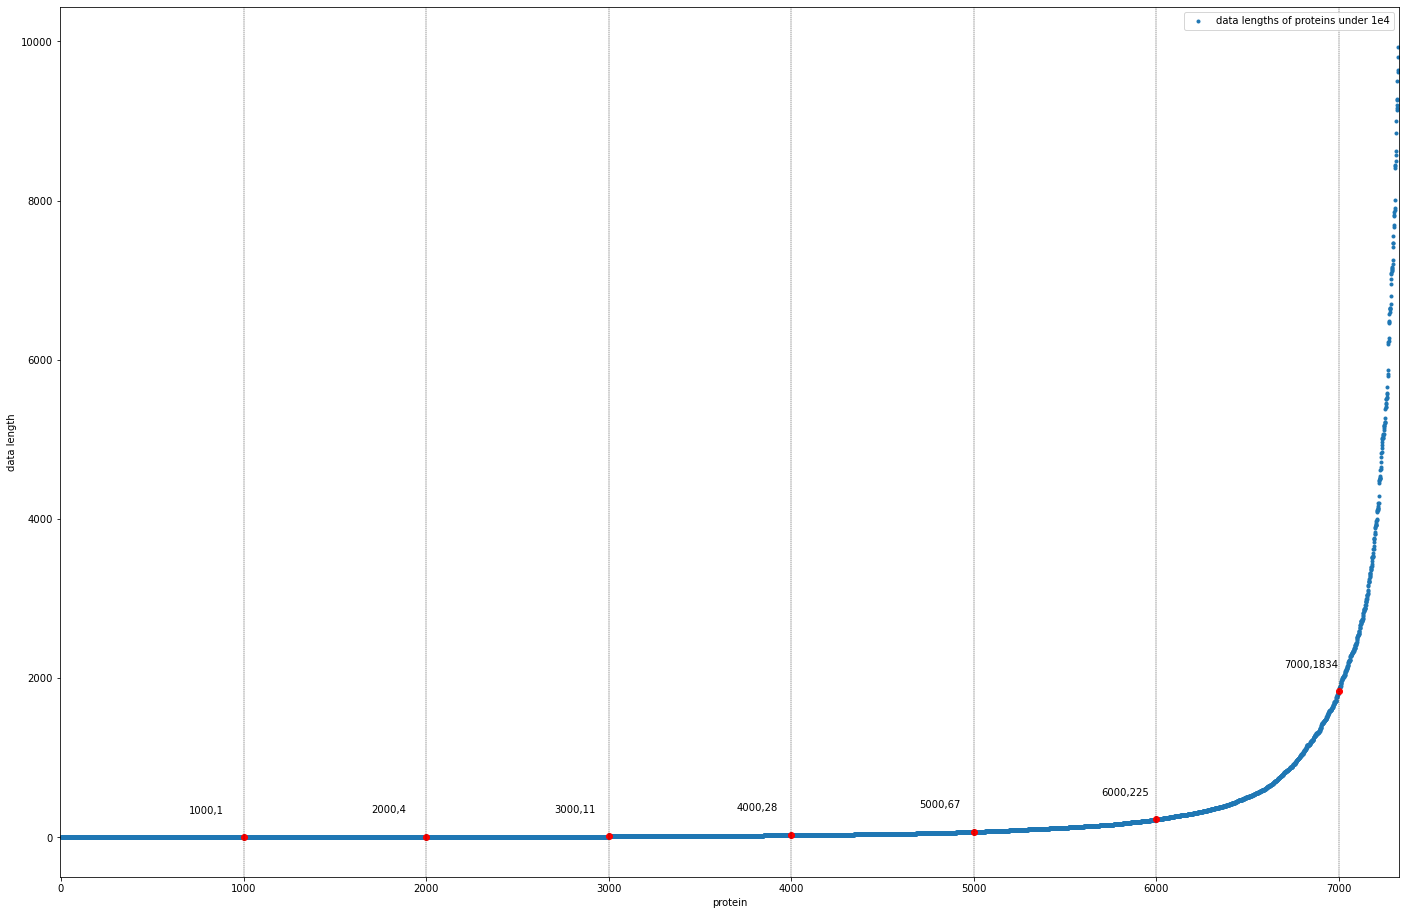

In [16]:
small_lengths = small_array[:,1]
small_lengths.sort()
plt.figure(figsize=(24,16))
plt.scatter(range(len(small_lengths)),small_lengths,marker='.',label='data lengths of proteins under 1e4')

plt.xlim(0-5,len(small_lengths)+5)

for i in range(1,8):
    plt.plot(i*1000,small_lengths[i*1000],'o',color='red')
    plt.text(i*1000-300,small_lengths[i*1000]+300,'{},{}'.format(i*1000,small_lengths[i*1000]) )
    plt.axvline(
        i*1000,
        color='black',
        linestyle='--',
        lw=0.4
        )

plt.legend()
plt.xlabel('protein')
plt.ylabel('data length')
plt.show()
#plt.plot(small_lengths,linestyle='-.')


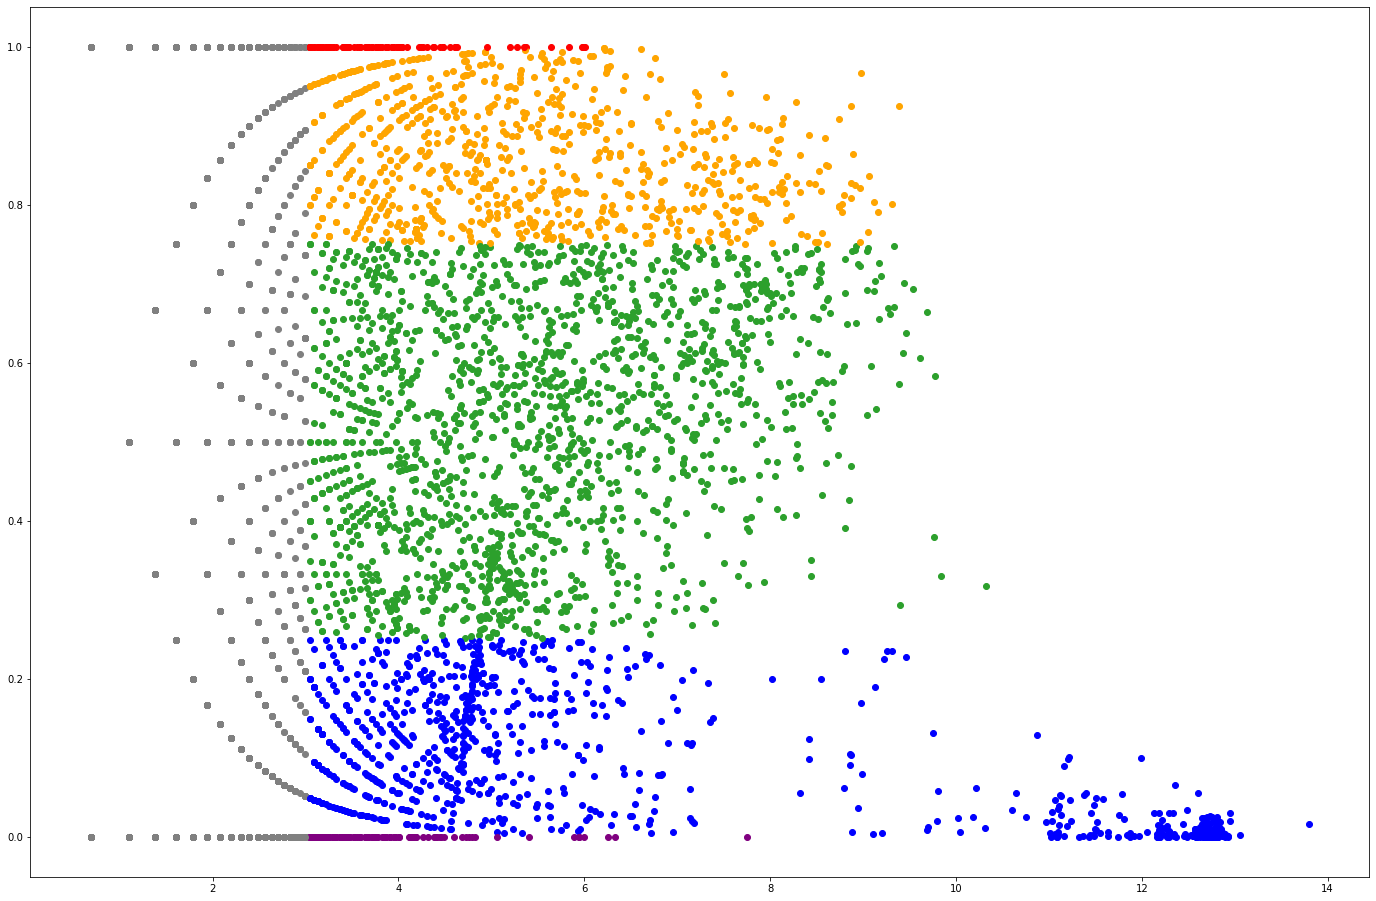

In [36]:
# 标签分布
log_lengths = np.log(lengths+1)
lbls_percent = num_pos_lbls/(num_pos_lbls+num_neg_lbls)
plt.figure(figsize=(24,16))


for i in range(len(log_lengths)):
    cur_log_l = log_lengths[i]
    cur_lbl_percent = lbls_percent[i]
    if(lengths[i]<20):
        cc='gray'
        plt.plot(cur_log_l,cur_lbl_percent,'o',color=cc)
        continue
    if(cur_lbl_percent==1):
        cc = 'red'
        #pos_list.append(i)
    elif (cur_lbl_percent>0.75):
        cc = 'orange'
    elif (cur_lbl_percent>0.25):
        cc = 'tab:green'
    elif (cur_lbl_percent>0):
        cc = 'blue'
    elif (cur_lbl_percent==0):
        cc = 'purple'
        #neg_list.append(i)
    
    plt.plot(cur_log_l,cur_lbl_percent,'o',color=cc)
    #plt.legend()
#plt.scatter(log_lengths,lbls_precent)
plt.show()

NameError: name 'pos_list' is not defined

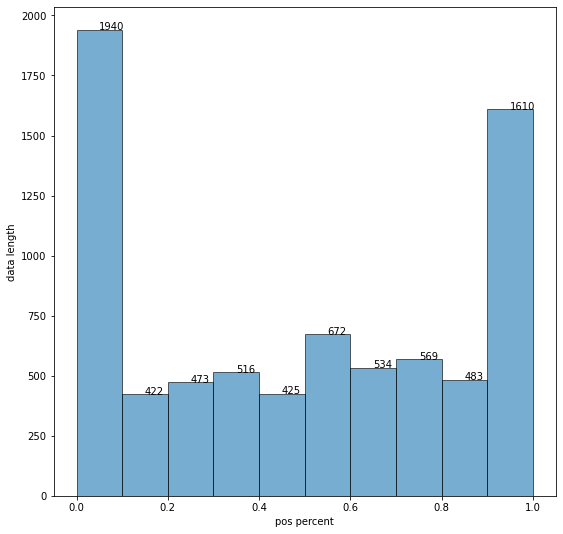

In [34]:
plt.figure(figsize=(9,9))
frequency_each, _,_ = plt.hist(lbls_percent,bins=np.arange(0,1.1,0.1),color='tab:blue',edgecolor='black',alpha=0.6,width=0.1)
for i in range(len(frequency_each)):
    plt.text(0.1*i+0.05,frequency_each[i],'{}'.format(int(frequency_each[i])))

plt.xlabel('pos percent')
plt.ylabel('data length')
plt.show()

In [ ]:
total_lengths = np.sum(small_array[:,1])
for i in range(len(small_lengths)):
    

In [9]:
a = np.argmax(output_df['length'].values)

In [11]:
output_df.iloc[4910]

sequence       MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...
idx                                                         2399
length                                                    978412
num_pos_lbl                                                16298
num_neg_lbl                                               962114
pos_percent                                             0.016658
sim_mean                                                0.135112
sim_max                                                 0.714286
sim_var                                                 0.002021
Name: 4910, dtype: object